In [91]:
import os
import pandas as pd

In [92]:
CaseName_Base = 'RTS24'
CaseName_ByStages = CaseName_Base + '_ByStages'
# CaseName_ByStages_1 = CaseName_Base + '_ByStages_OC_fy_1'
# CaseName_ByStages_2 = CaseName_Base + '_ByStages_OC_fy_2'
# CaseName_ByStages_3 = CaseName_Base + '_ByStages_OC_fy_3'
# CaseName_ByStages_4 = CaseName_Base + '_ByStages_OC_fy_4'

In [93]:
Folder_A = 'A.The_full_year_MILP'
# Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
# Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
# Folder_G = 'G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
# Folder_H = 'H.Representative_days_based_on_Line_Benefit_NN_OC_fy_3'
# Folder_I = 'I.Representative_days_based_on_Line_Benefit_NN_OC_fy_4'

In [94]:
DirName  = os.getcwd()

In [95]:
_path_0 = os.path.join(DirName, CaseName_Base)

In [96]:
def LoadingData(dir, folder, case, cat1, cat2, cat3):
    df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', 'oT_Result_NetworkInvestment_'+case+'.csv'), index_col=[0,1,2,3])
    df['CaseName'] = folder + ' - ' + case
    df['Category1'] = cat1
    df['Category2'] = cat2
    df['Category3'] = cat3
    df = df.set_index('CaseName', append=True)
    return df

In [97]:
df_A = LoadingData(DirName, Folder_A, CaseName_Base, 'Original', '1.Full Year', '1.OptModel')
# df_B = LoadingData(DirName, Folder_B, CaseName_ByStages)
df_D = LoadingData(DirName, Folder_D, CaseName_ByStages, 'Representative Days', '2.RES and Demand', '1.OptModel')
df_E = LoadingData(DirName, Folder_E, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '1.OptModel')
# df_F = LoadingData(DirName, Folder_F, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_1')
# df_G = LoadingData(DirName, Folder_G, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_2')
# df_H = LoadingData(DirName, Folder_H, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_3')
# df_I = LoadingData(DirName, Folder_I, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_4')

In [98]:
# df = pd.concat([df_A, df_D, df_E, df_F, df_G, df_H, df_I], axis=0)
df = pd.concat([df_A, df_D, df_E], axis=0)


In [99]:
# select the row Total System Cost of dataframe df
df = df.reset_index()

In [100]:
df= df[['InitialNode', 'FinalNode', 'Circuit','CaseName','p.u.', 'Category1', 'Category2', 'Category3']]

In [101]:
# df = df.loc[df['Cost/Payment'] == 'Total          System Cost']

In [102]:
df = df.loc[df['p.u.'] == 1.0]

In [103]:
df['Category4'] = df['Category2'] + ' - ' + df['Category3']

In [104]:
df['Category5'] = df['InitialNode'] + ' - ' + df['FinalNode'] + ' - ' + df['Circuit']

In [105]:
df = pd.pivot_table(df, values='p.u.', index=['InitialNode', 'FinalNode', 'Circuit', 'CaseName', 'Category1', 'Category2', 'Category3', 'Category4', 'Category5'], aggfunc='sum')

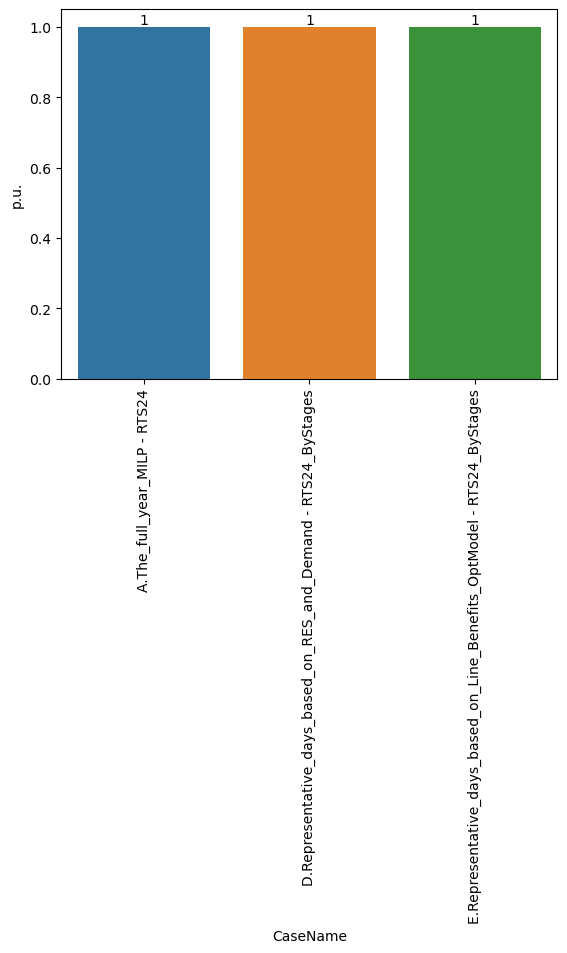

In [106]:
# import the necessary python packages
import seaborn as sns
import numpy as np

 
# create a bar plot by specifying
# x and y axis and the data to be used.
ax = sns.barplot(x='CaseName', y='p.u.', data=df.reset_index(),
                 errwidth=0)
 
# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
ax.tick_params(axis='x', rotation=90)

In [107]:
df.reset_index()

,InitialNode,FinalNode,Circuit,CaseName,Category1,Category2,Category3,Category4,Category5,p.u.
0,N_115,N_121,cac1,A.The_full_year_MILP - RTS24,Original,1.Full Year,1.OptModel,1.Full Year - 1.OptModel,N_115 - N_121 - cac1,1.0
1,N_115,N_121,cac1,D.Representative_days_based_on_RES_and_Demand ...,Representative Days,2.RES and Demand,1.OptModel,2.RES and Demand - 1.OptModel,N_115 - N_121 - cac1,1.0
2,N_115,N_121,cac1,E.Representative_days_based_on_Line_Benefits_O...,Representative Days,3.Line Benefits,1.OptModel,3.Line Benefits - 1.OptModel,N_115 - N_121 - cac1,1.0
3,N_115,N_121,cac2,A.The_full_year_MILP - RTS24,Original,1.Full Year,1.OptModel,1.Full Year - 1.OptModel,N_115 - N_121 - cac2,1.0
4,N_115,N_121,cac2,E.Representative_days_based_on_Line_Benefits_O...,Representative Days,3.Line Benefits,1.OptModel,3.Line Benefits - 1.OptModel,N_115 - N_121 - cac2,1.0
5,N_115,N_124,cac1,A.The_full_year_MILP - RTS24,Original,1.Full Year,1.OptModel,1.Full Year - 1.OptModel,N_115 - N_124 - cac1,1.0
6,N_115,N_124,cac1,E.Representative_days_based_on_Line_Benefits_O...,Representative Days,3.Line Benefits,1.OptModel,3.Line Benefits - 1.OptModel,N_115 - N_124 - cac1,1.0
7,N_116,N_117,cac1,A.The_full_year_MILP - RTS24,Original,1.Full Year,1.OptModel,1.Full Year - 1.OptModel,N_116 - N_117 - cac1,1.0
8,N_116,N_117,cac1,D.Representative_days_based_on_RES_and_Demand ...,Representative Days,2.RES and Demand,1.OptModel,2.RES and Demand - 1.OptModel,N_116 - N_117 - cac1,1.0
9,N_116,N_117,cac1,E.Representative_days_based_on_Line_Benefits_O...,Representative Days,3.Line Benefits,1.OptModel,3.Line Benefits - 1.OptModel,N_116 - N_117 - cac1,1.0


In [110]:
df['pu'] = df['p.u.']

In [117]:
import altair as alt

base = alt.Chart(df.reset_index()).encode(
    alt.X("Category2:O").title(''),
    alt.Y("sum(pu):Q").title('Network Investment (p.u.)'),
    alt.Color("Category2:N").title('').legend(None),
    alt.Text("sum(pu):Q", format=".0f"),
).properties(
    width=100,
    height=100
)

alt.layer(
    base.mark_bar(),
    base.mark_text(dy=-10)
).facet(
    alt.Column("Category5:N", title=None)
).configure_facet(spacing=20).resolve_scale(
  x='independent'
)


alt.FacetChart(...)